In [1]:
from matplotlib import pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from data_processing import process_data

In [4]:
def evaluate_prediction(y_test, y_predicted):
    acc = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='macro')
    prec = precision_score(y_test, y_predicted, average='macro', zero_division=0)
    rec = precision_score(y_test, y_predicted, average='macro')
    confMat = confusion_matrix(y_test, y_predicted)
    
    return {"accuracy": acc, "f1": f1, "precision": prec, "recall": rec, "confusion_matrix": confMat}

In [5]:
data = process_data()
data.shape

/home/mira/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(19348, 612)

[]

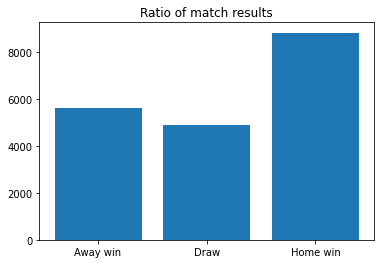

In [6]:
class_distribution = data['match_outcome'].value_counts()
plt.title('Ratio of match results')
plt.bar(class_distribution.index, class_distribution.values)
plt.xticks(ticks=class_distribution.index, labels=['Home win', 'Away win', 'Draw'])
plt.plot()

In [7]:
y = data['match_outcome']
X = data.drop(columns=['match_outcome'], axis=1)

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.8, random_state=40)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

### l1 regularization

In [10]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=500)
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'class_weight': [None, 'balanced'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'C': 0.1, 'class_weight': None}
{'accuracy': 0.5080103359173127, 'f1': 0.405378341304971, 'precision': 0.43271874122310194, 'recall': 0.43271874122310194, 'confusion_matrix': array([[ 449,  103,  521],
       [ 260,   82,  648],
       [ 275,   97, 1435]])}


### l2 regularization

In [11]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500)
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'class_weight': [None, 'balanced'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'C': 0.01, 'class_weight': None}
{'accuracy': 0.5023255813953489, 'f1': 0.41040995747382647, 'precision': 0.42797326311405065, 'recall': 0.42797326311405065, 'confusion_matrix': array([[ 453,  128,  492],
       [ 276,  102,  612],
       [ 282,  136, 1389]])}


### elasticnet regularization

In [12]:
model = LogisticRegression(solver='saga', penalty='elasticnet', max_iter=5000)
param_grid = {
    'C': [0.1, 1.0],
    'l1_ratio':[0, 0.5, 1]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

Best Parameters: {'C': 0.1, 'l1_ratio': 1}
{'accuracy': 0.50671834625323, 'f1': 0.40847992567037505, 'precision': 0.430818805295472, 'recall': 0.430818805295472, 'confusion_matrix': array([[ 450,  115,  508],
       [ 270,   91,  629],
       [ 272,  115, 1420]])}


## k-Nearest Neighbors

In [13]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'], # handling imbalansed data in this algorithm
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
{'accuracy': 0.46098191214470285, 'f1': 0.39609748514667115, 'precision': 0.4010532500993194, 'recall': 0.4010532500993194, 'confusion_matrix': array([[ 416,  189,  468],
       [ 279,  154,  557],
       [ 351,  242, 1214]])}


## Support Vector Machine

In [14]:
model = SVC(kernel='linear')
param_grid = {
    'C': [0.1, 1.0],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'C': 0.1, 'class_weight': None}
{'accuracy': 0.5023255813953489, 'f1': 0.40027471609480103, 'precision': 0.42789618877854174, 'recall': 0.42789618877854174, 'confusion_matrix': array([[ 421,  110,  542],
       [ 261,   88,  641],
       [ 270,  102, 1435]])}


## Decision Tree

In [15]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 15, 20],    # Maximum depth of the tree
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'class_weight': None, 'max_depth': 5}
{'accuracy': 0.4754521963824289, 'f1': 0.2474325331569948, 'precision': 0.3724364364364365, 'recall': 0.3724364364364365, 'confusion_matrix': array([[  59,    5, 1009],
       [  28,    1,  961],
       [  24,    3, 1780]])}


## Random Forest

In [16]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20],
    'class_weight': [None, 'balanced'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'class_weight': None, 'max_depth': 20, 'n_estimators': 100}
{'accuracy': 0.4943152454780362, 'f1': 0.3046049692966747, 'precision': 0.40842343120131225, 'recall': 0.40842343120131225, 'confusion_matrix': array([[ 183,    4,  886],
       [  88,    3,  899],
       [  72,    8, 1727]])}
